In [2]:
import pandas as pd

In [3]:
bike_data = pd.read_csv("Preprocessed_sathish_bike_data.csv",
                      parse_dates=["Datetime", "PICKUP_DATETIME","DROPOFF_DATETIME"],
                      index_col=0)

C:\Users\Sathishkumar V E\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
bike_data.columns

Index(['Datetime', 'TRIP_DURATION', 'TRIP_DISTANCE', 'PICKUP_DATETIME',
       'PICKUP_LONGITUDE', 'PICKUP_LATITUDE', 'PICKUP_DISTRICT',
       'DROPOFF_DATETIME', 'DROPOFF_LONGITUDE', 'DROPOFF_LATITUDE',
       'DROPOFF_DISTRICT', 'GEOGRAPHICAL_DISTANCE', 'PICKUP_MONTH',
       'PICKUP_DAY', 'PICKUP_HOUR', 'PICKUP_MINUTE', 'PICKUP_WEEKDAY',
       'DROPOFF_MONTH', 'DROPOFF_DAY', 'DROPOFF_HOUR', 'DROPOFF_MINUTE',
       'DROPOFF_WEEKDAY', 'TEMPERATURE(°C)', 'PRECIPITATION(mm)',
       'WINDSPEED(m/s)', 'HUMIDITY(%)', 'SOLAR RADIATION(MJ/m2)', 'SNOW(cm)',
       'GROUND TEMPERATURE (°C)', '1 Hour Average Dust Concentration (㎍/㎥)'],
      dtype='object')

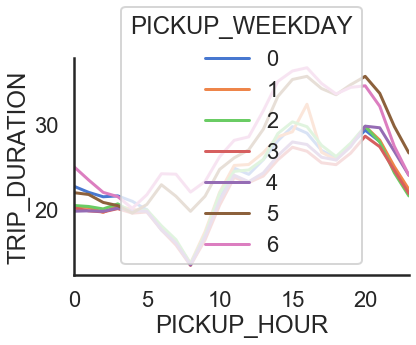

In [9]:
import seaborn as sns
summary_hour_duration = pd.DataFrame(bike_data.groupby(['PICKUP_WEEKDAY','PICKUP_HOUR'])['TRIP_DURATION'].mean())
summary_hour_duration.reset_index(inplace = True)
summary_hour_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=False)
sns.set_context("poster")
sns.tsplot(data=summary_hour_duration, time="PICKUP_HOUR", unit = "unit", condition="PICKUP_WEEKDAY", value="TRIP_DURATION")
sns.despine(bottom = False)

In [27]:
df = bike_data
# Convert the date to a pandas datetime format
df['PICKUP_DATETIME'] = pd.to_datetime(df['PICKUP_DATETIME'], format="%Y/%m/%d %H:%M:%S")
df['DROPOFF_DATETIME'] = pd.to_datetime(df['DROPOFF_DATETIME'], format="%Y/%m/%d %H:%M:%S")

# Pull out the month, day of week and hour of day and make a new feature for each
df['MONTH'] = df['PICKUP_DATETIME'].dt.month
df['DOW'] = df['PICKUP_DATETIME'].dt.dayofweek
df['HOUR'] = df['PICKUP_DATETIME'].dt.hour

# Count number of pickups made per month, day of week and hour of day
month_usage = pd.value_counts(df['MONTH']).sort_index()
dow_usage = pd.value_counts(df['DOW']).sort_index()
hour_usage = pd.value_counts(df['HOUR']).sort_index()

There were a total of 9601139 Rental Bike pickups made


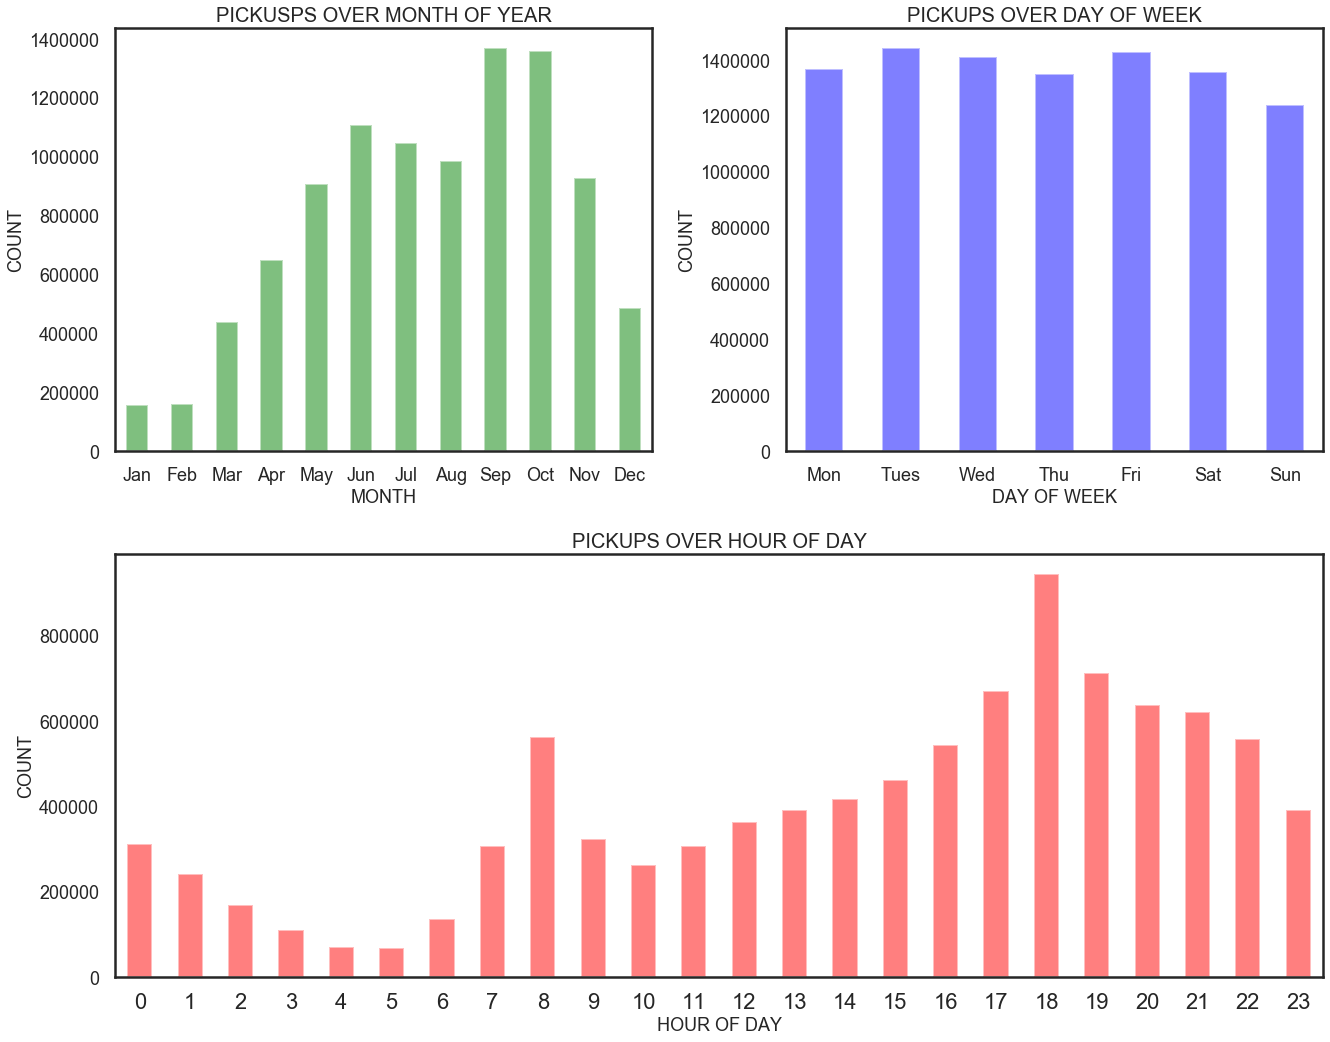

In [32]:
x_tick_labels_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x_tick_labels_day = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# define subplot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(19, 15))

figure = plt.subplot(2, 2, 1)
month_usage.plot.bar(alpha = 0.5, color = 'green')
plt.title('PICKUSPS OVER MONTH OF YEAR', fontsize = 20)
plt.xlabel('MONTH', fontsize = 18)
plt.ylabel('COUNT', fontsize = 18)
plt.xticks(month_usage.index - 1, x_tick_labels_month, rotation='90', fontsize=18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

figure = plt.subplot(2, 2, 2)
dow_usage.plot.bar(alpha = 0.5, color = 'blue')
plt.title('PICKUPS OVER DAY OF WEEK', fontsize = 20)
plt.xlabel('DAY OF WEEK', fontsize = 18)
plt.ylabel('COUNT', fontsize = 18)
plt.xticks(dow_usage.index, x_tick_labels_day, rotation='90', fontsize=18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

figure = plt.subplot(2, 1, 2)
hour_usage.plot.bar(alpha = 0.5, color = 'red')
plt.title('PICKUPS OVER HOUR OF DAY', fontsize = 20)
plt.xlabel('HOUR OF DAY', fontsize = 18)
plt.ylabel('COUNT', fontsize = 18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

fig.tight_layout()
# print the total number of Taxi pickups
print ("There were a total of %d Rental Bike pickups made" % (len(bike_data)))

Text(0.5, 1.0, 'PICKUP HOURS DISTRIBUTION')

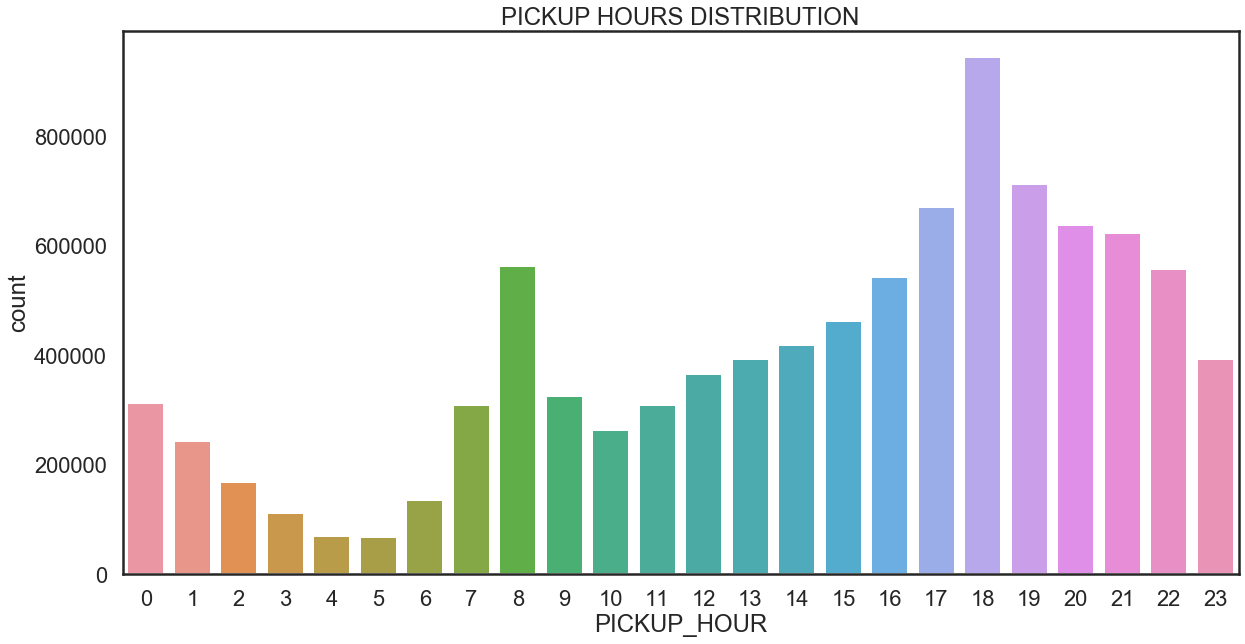

In [36]:

Which hours are pickup and dropoff higher?

plt.figure(figsize=(20,10))
sns.countplot(x=bike_data['PICKUP_HOUR']).set_title("PICKUP HOURS DISTRIBUTION")

Text(0.5, 1.0, 'DROPOFF HOURS DISTRIBUTION')

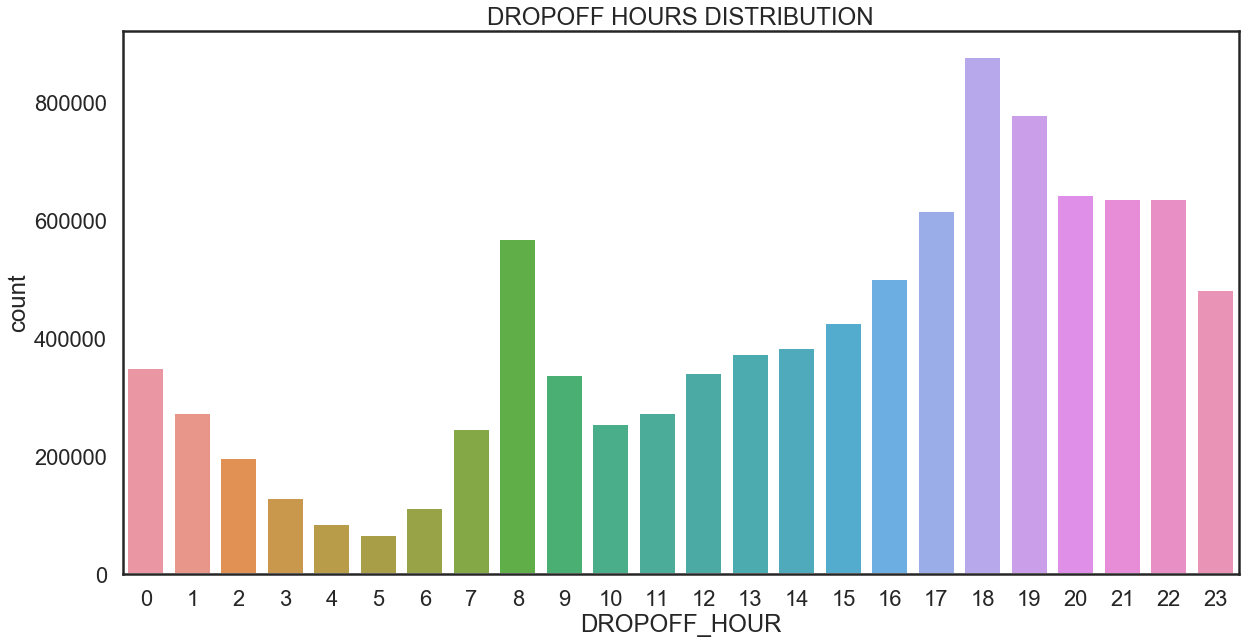

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x=bike_data['DROPOFF_HOUR']).set_title("DROPOFF HOURS DISTRIBUTION")

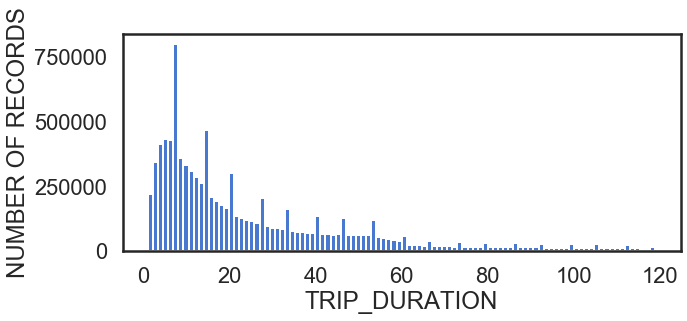

In [42]:
plt.subplots(figsize=(10,4))
plt.hist(bike_data['TRIP_DURATION'].values, bins=100)
plt.xlabel('TRIP_DURATION')
plt.ylabel('NUMBER OF RECORDS')
plt.show()

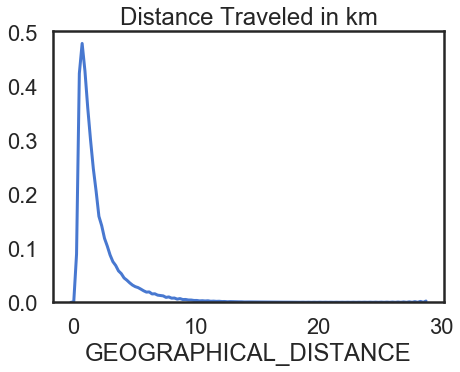

In [44]:
plt.figure(figsize=(7, 5))
plt.title('Distance Traveled in km')
sns.distplot(bike_data['GEOGRAPHICAL_DISTANCE'], hist=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'DROPOFF')

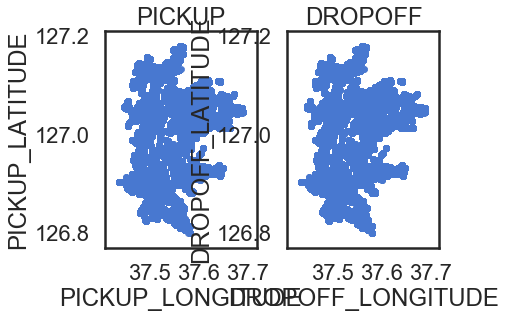

In [49]:
f, ((ax1, ax2)) = plt.subplots(ncols=2, nrows=1)

bike_data.plot(kind='scatter', x='PICKUP_LONGITUDE', y='PICKUP_LATITUDE', ax=ax1, alpha=0.25)
ax1.set_title('PICKUP')
bike_data.plot(kind='scatter', x='DROPOFF_LONGITUDE', y='DROPOFF_LATITUDE', ax=ax2, alpha=0.25)
ax2.set_title('DROPOFF')

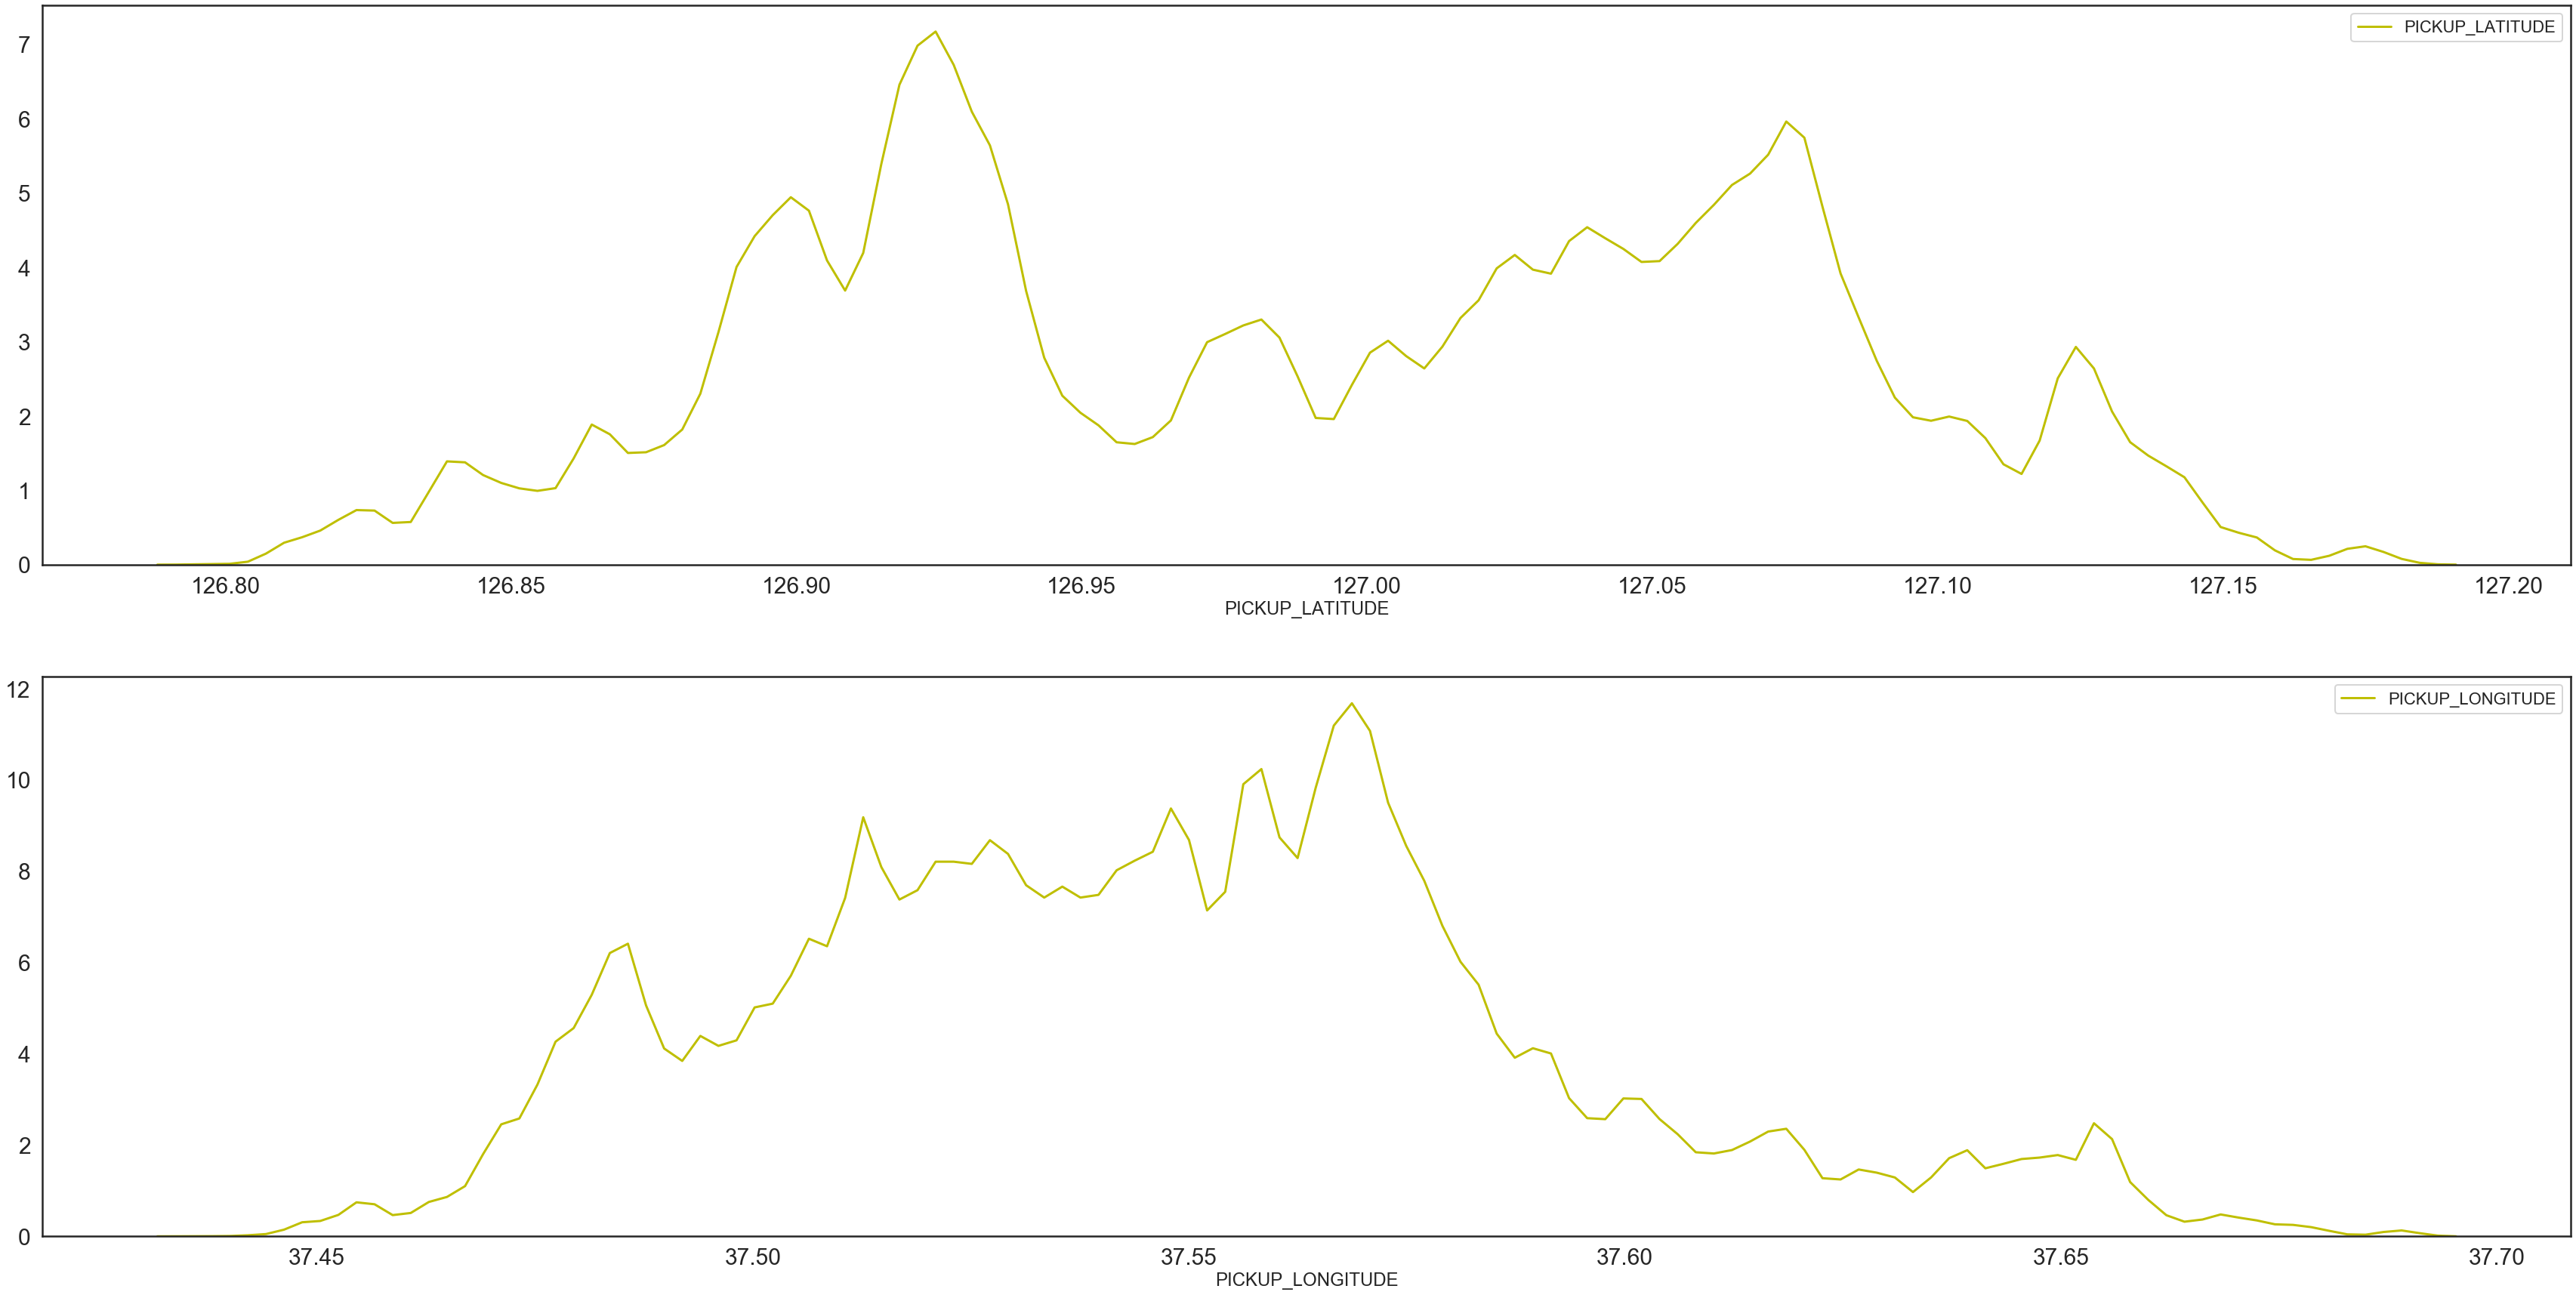

In [55]:
f, axes = plt.subplots(2,figsize=(60, 30), sharex=False, sharey = False)
sns.distplot(df['PICKUP_LATITUDE'], label = 'PICKUP_LATITUDE',color="y",bins = 100, ax=axes[0], hist=False).tick_params(labelsize=30)
sns.distplot(df['PICKUP_LONGITUDE'], label = 'PICKUP_LONGITUDE',color="y",bins =100, ax=axes[1], hist=False).tick_params(labelsize=30)

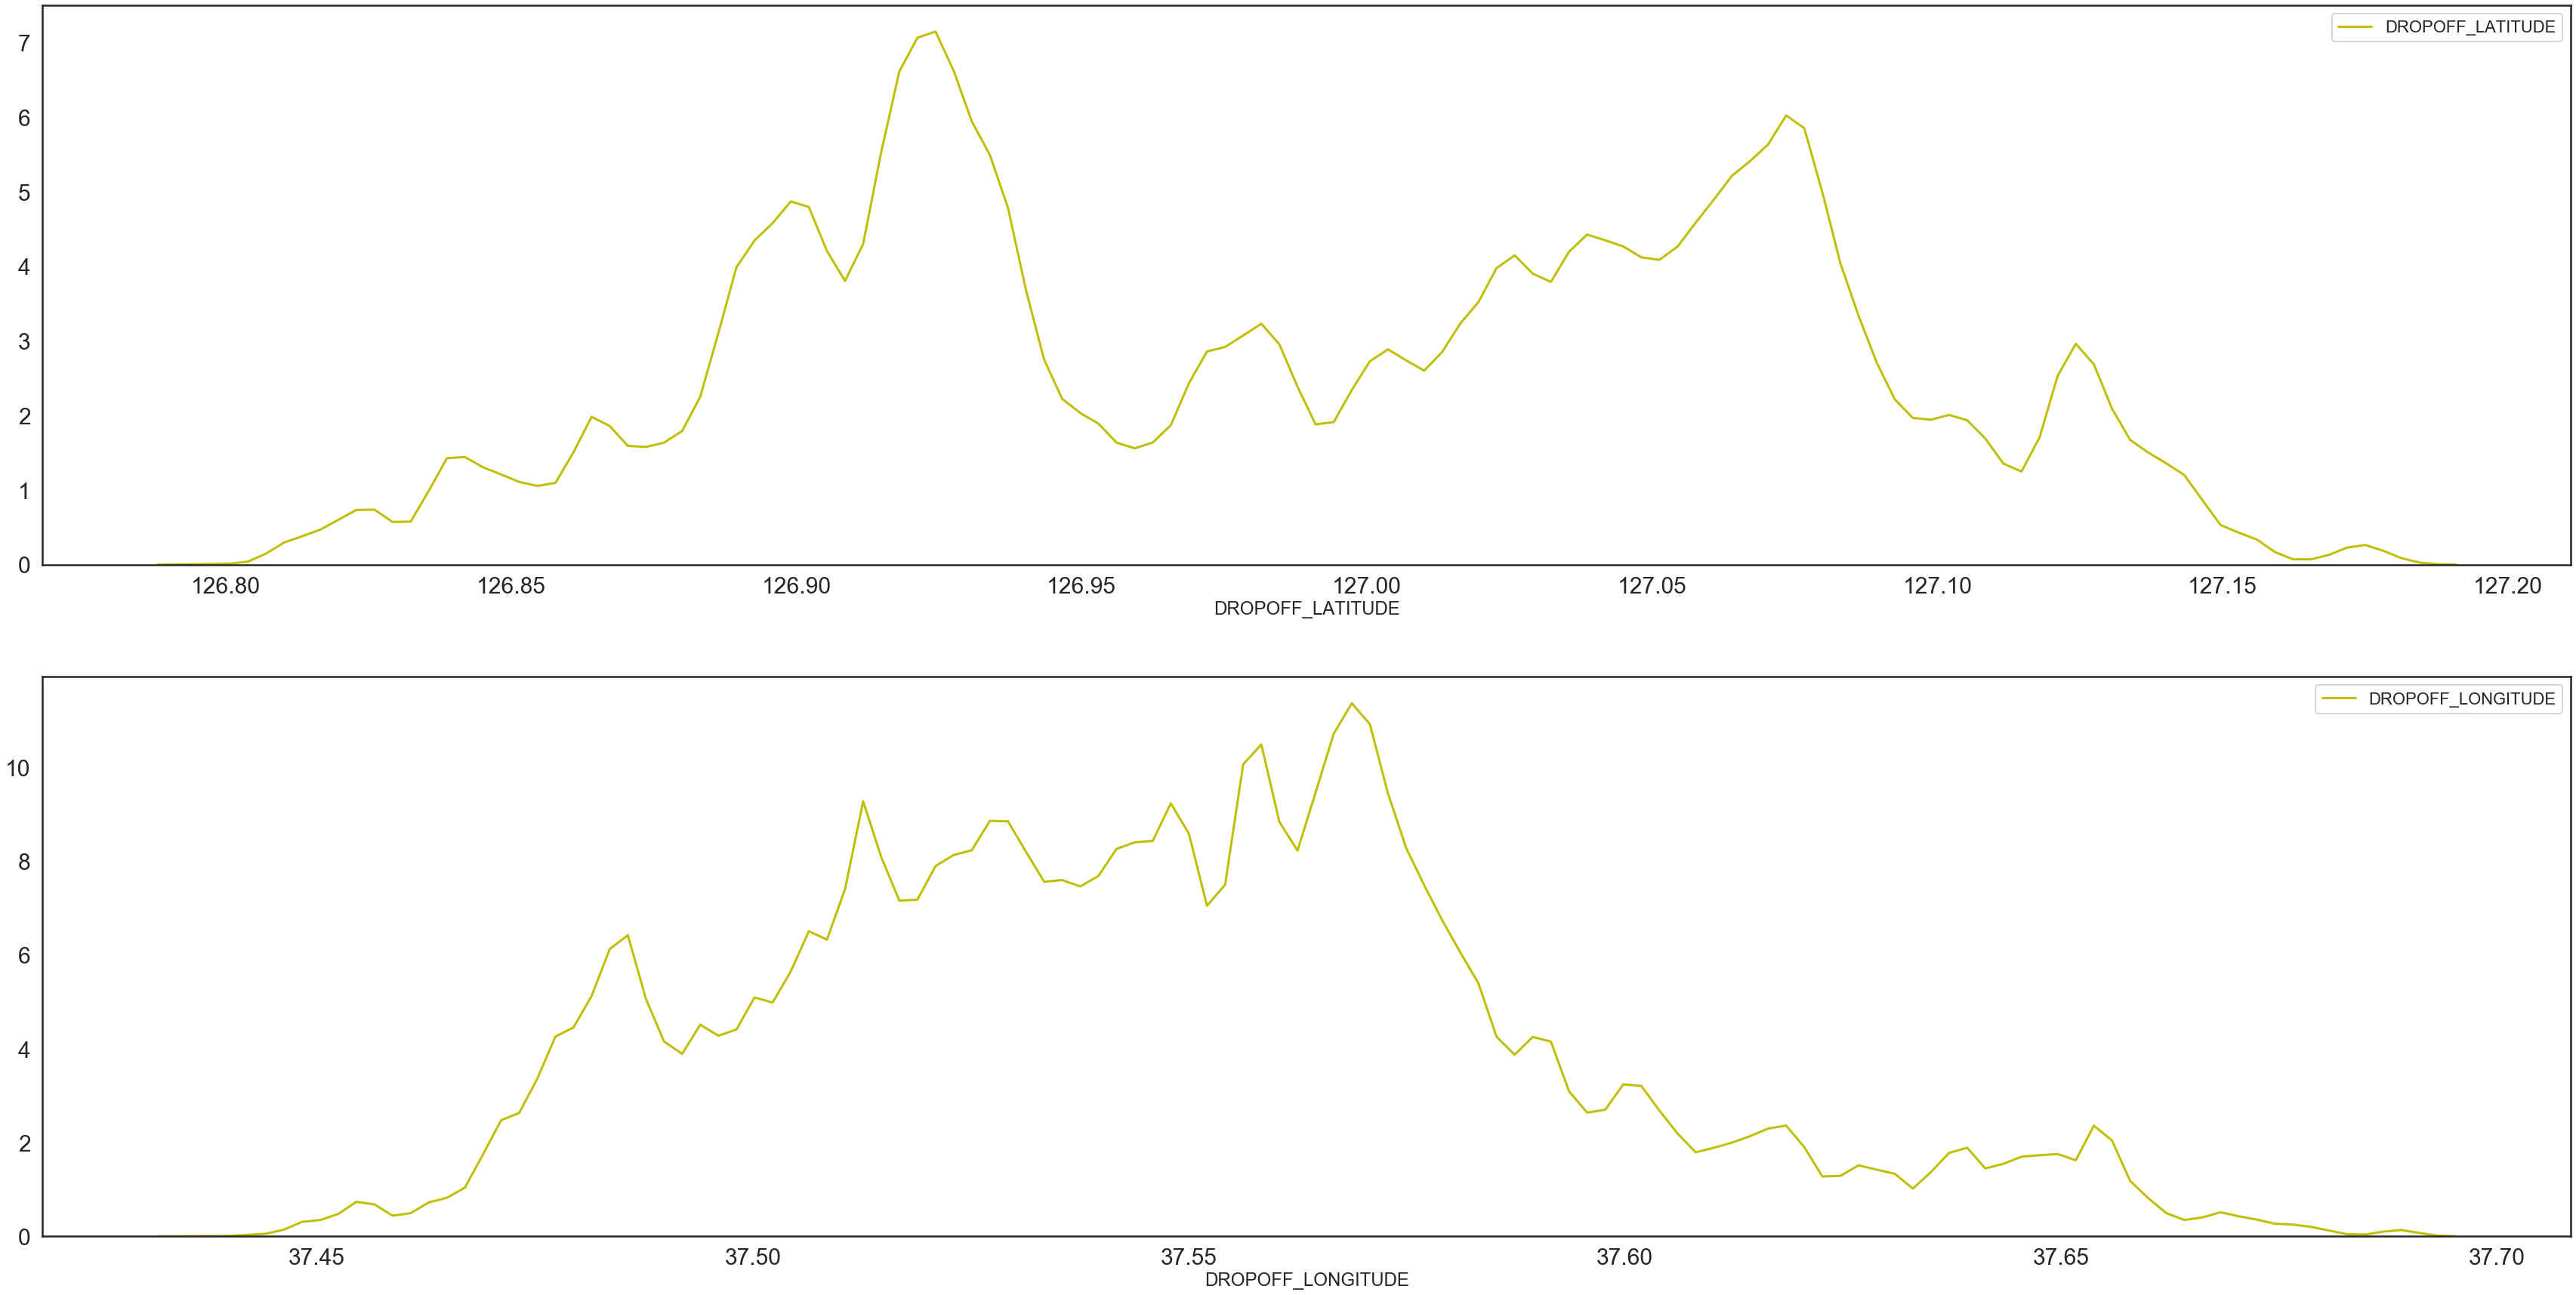

In [56]:
f, axes = plt.subplots(2,figsize=(60, 30), sharex=False, sharey = False)
sns.distplot(df['DROPOFF_LATITUDE'], label = 'DROPOFF_LATITUDE',color="y",bins = 100, ax=axes[0], hist=False).tick_params(labelsize=30)
sns.distplot(df['DROPOFF_LONGITUDE'], label = 'DROPOFF_LONGITUDE',color="y",bins =100, ax=axes[1], hist=False).tick_params(labelsize=30)

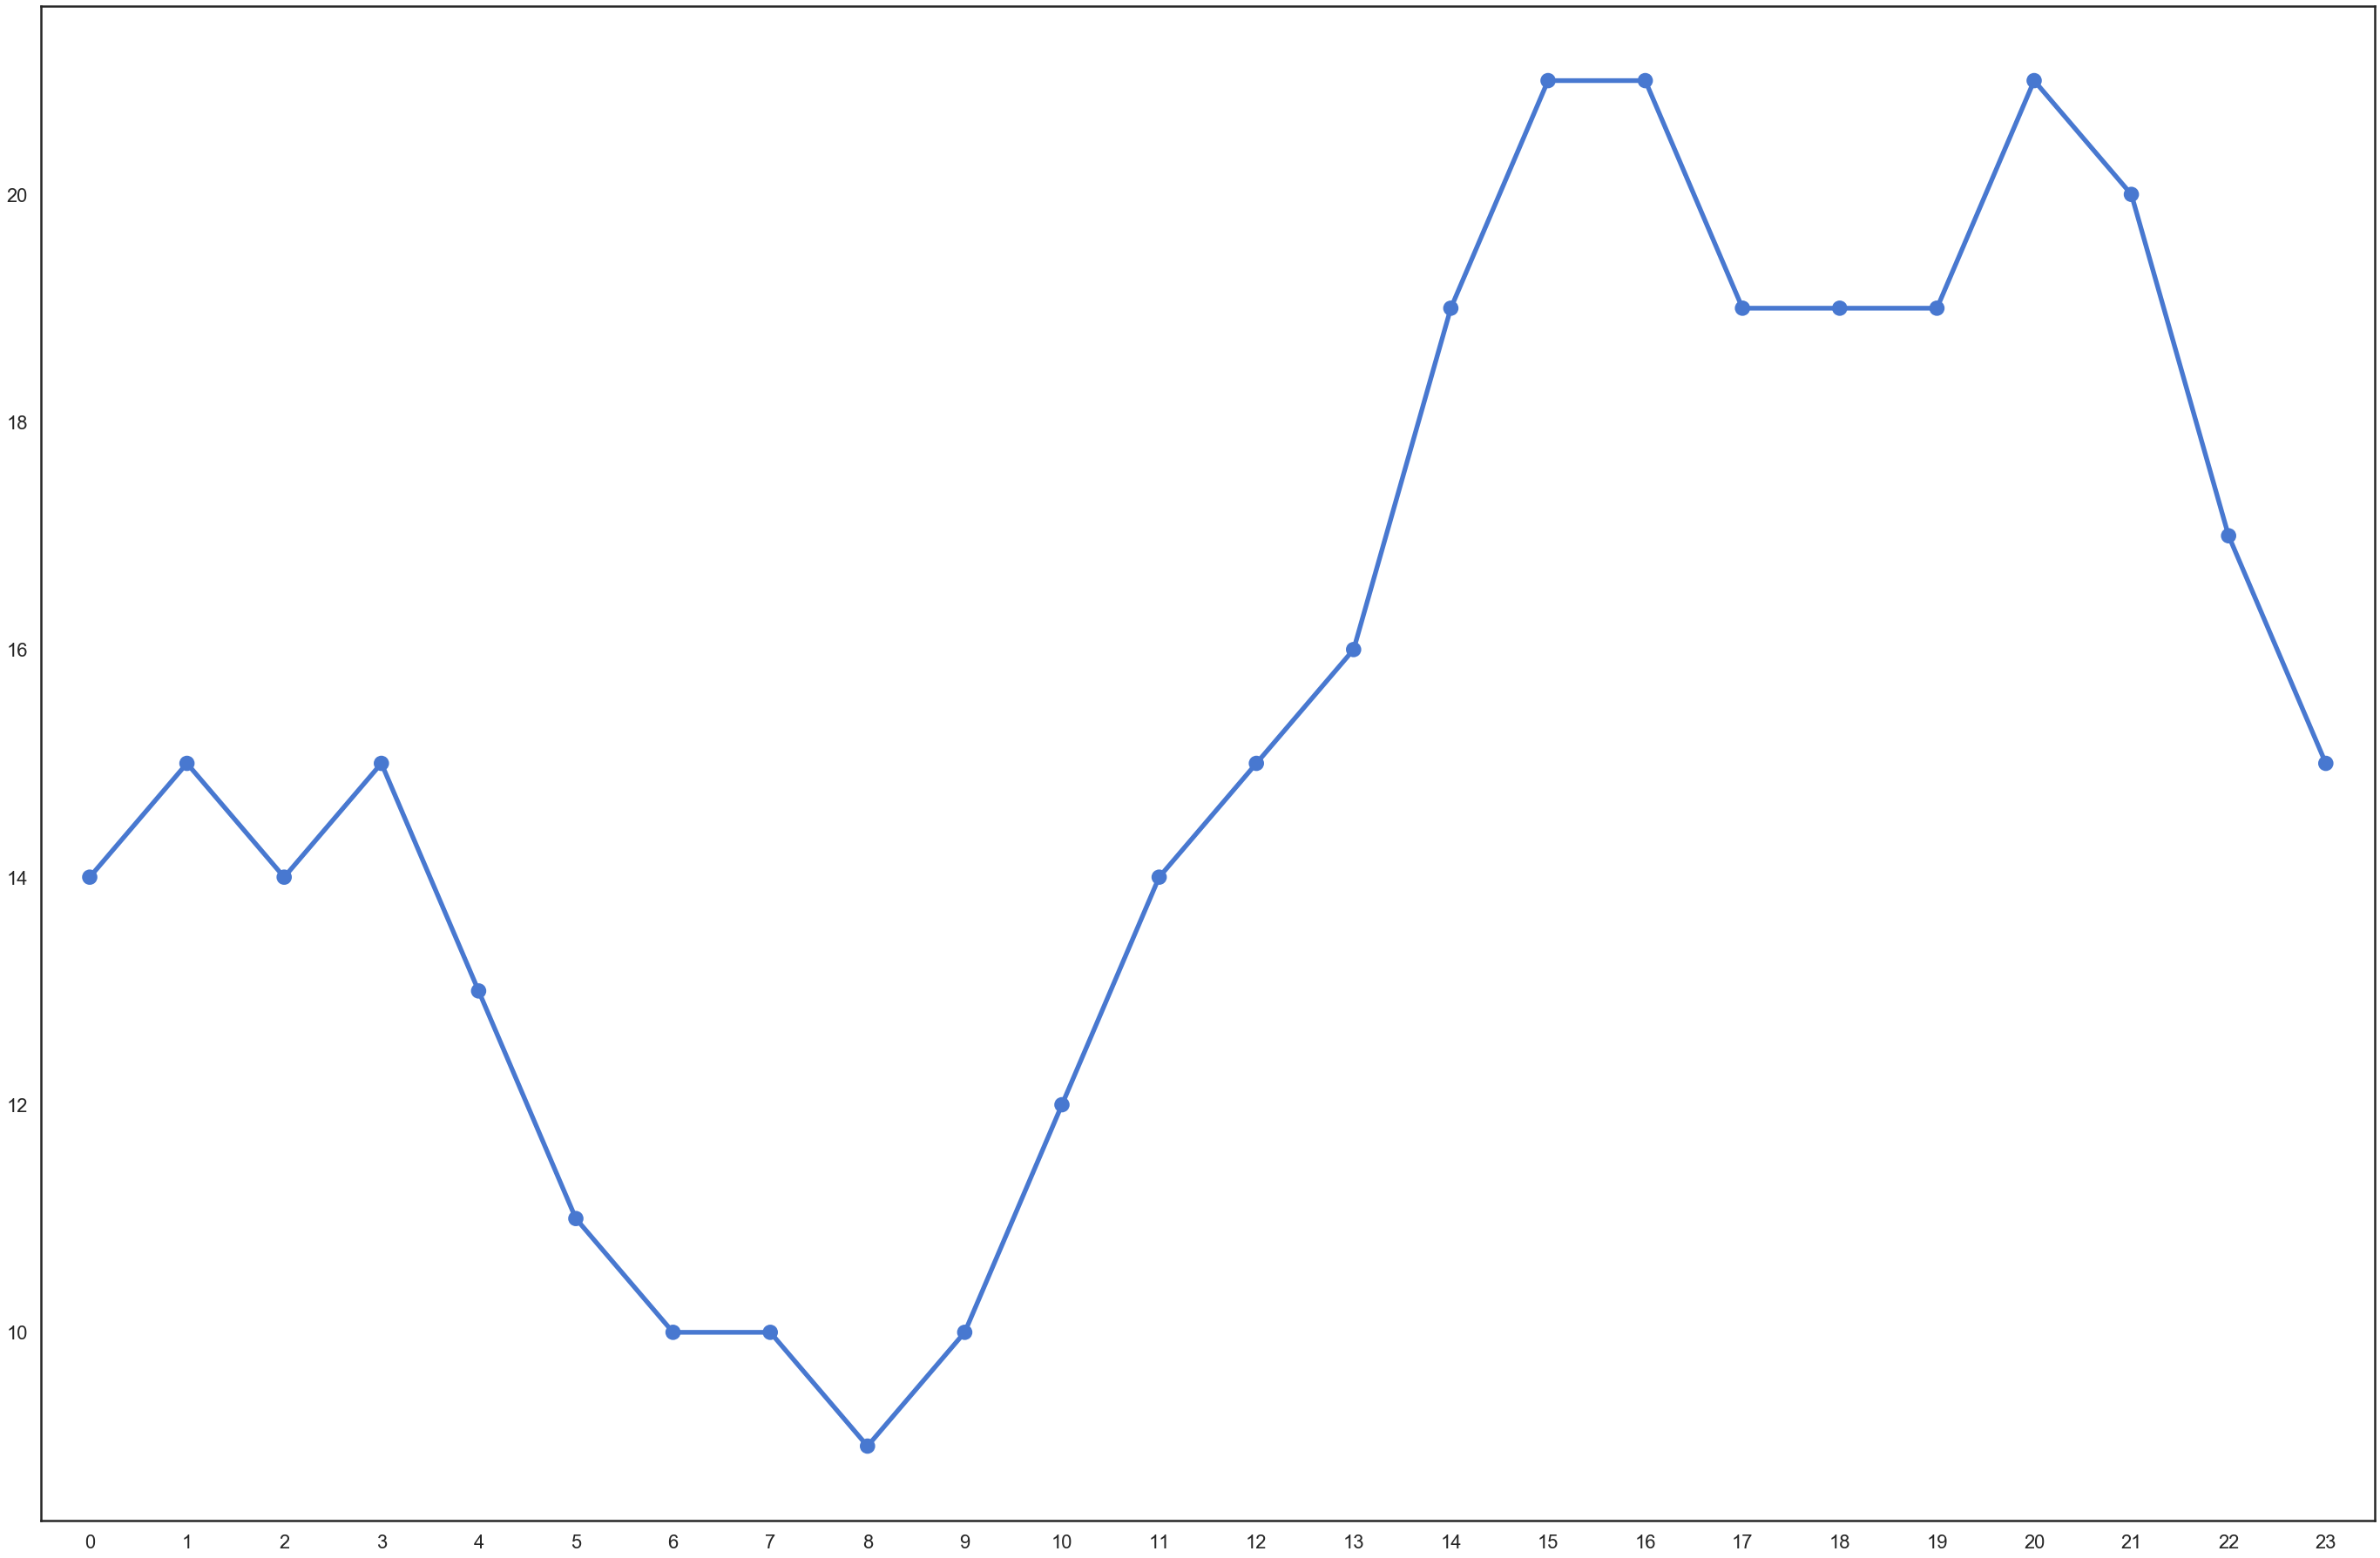

In [60]:
bike_data_agg = bike_data.groupby('PICKUP_HOUR')['TRIP_DURATION'].aggregate(np.median).reset_index()

plt.figure(figsize=(48,32))
sns.pointplot(bike_data_agg.PICKUP_HOUR.values, bike_data_agg.TRIP_DURATION.values)
plt.show()

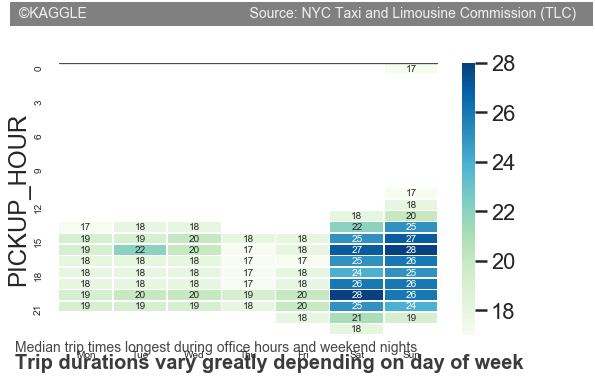

In [61]:
trip_duration_median = bike_data['TRIP_DURATION'].median()
plt.figure(figsize=(8.5,5))
pickup_hourday = bike_data.groupby(['PICKUP_HOUR','PICKUP_WEEKDAY'])['TRIP_DURATION'].median().unstack()
hourday_graph = sns.heatmap(pickup_hourday[pickup_hourday>trip_duration_median],
                                   lw = .5, annot = True, cmap = 'GnBu', fmt = 'g',annot_kws = {"size":10} )
# Customize tick label size
hourday_graph.tick_params(axis = 'both', which = 'major', labelsize = 10)

# Customize tick labels of the y-axis
hourday_graph.set_xticklabels(labels = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun'])

# Bolding horizontal line at y = 0
hourday_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .70)

# Remove the label of the x-axis
hourday_graph.xaxis.label.set_visible(False)

# Add signature bar
hourday_graph.text(x = -.8,  y = -4,
                   s = ' ©KAGGLE                                          Source: NYC Taxi and Limousine Commission (TLC)   ',
fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey') 

# # Adding a title and a subtitle
hourday_graph.text(x =-.8, y = 27, s = "Trip durations vary greatly depending on day of week",
               fontsize =20 , weight = 'bold', alpha = .90)
hourday_graph.text(x =-.8, y = 25.5, 
               s = 'Median trip times longest during office hours and weekend nights',
              fontsize = 14, alpha = .85)
plt.show()

In [73]:
bike_data['month'] = bike_data['Datetime'].dt.month
bike_data['day'] = bike_data['Datetime'].dt.day
bike_data['hour'] = bike_data['Datetime'].dt.hour
bike_data['weekday'] = bike_data['Datetime'].dt.dayofweek
bike_data.columns

Index(['Datetime', 'TRIP_DURATION', 'TRIP_DISTANCE', 'PICKUP_DATETIME',
       'PICKUP_LONGITUDE', 'PICKUP_LATITUDE', 'PICKUP_DISTRICT',
       'DROPOFF_DATETIME', 'DROPOFF_LONGITUDE', 'DROPOFF_LATITUDE',
       'DROPOFF_DISTRICT', 'GEOGRAPHICAL_DISTANCE', 'PICKUP_MONTH',
       'PICKUP_DAY', 'PICKUP_HOUR', 'PICKUP_MINUTE', 'PICKUP_WEEKDAY',
       'DROPOFF_MONTH', 'DROPOFF_DAY', 'DROPOFF_HOUR', 'DROPOFF_MINUTE',
       'DROPOFF_WEEKDAY', 'TEMPERATURE(°C)', 'PRECIPITATION(mm)',
       'WINDSPEED(m/s)', 'HUMIDITY(%)', 'SOLAR RADIATION(MJ/m2)', 'SNOW(cm)',
       'GROUND TEMPERATURE (°C)', '1 Hour Average Dust Concentration (㎍/㎥)',
       'MONTH', 'DOW', 'HOUR', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

[Text(0, 0.5, 'TRIP_DURATION'),
 Text(0.5, 0, 'TRIP DISTANCE'),
 Text(0.5, 1.0, 'Box Plot On Trip Duration Across Distance Traveled')]

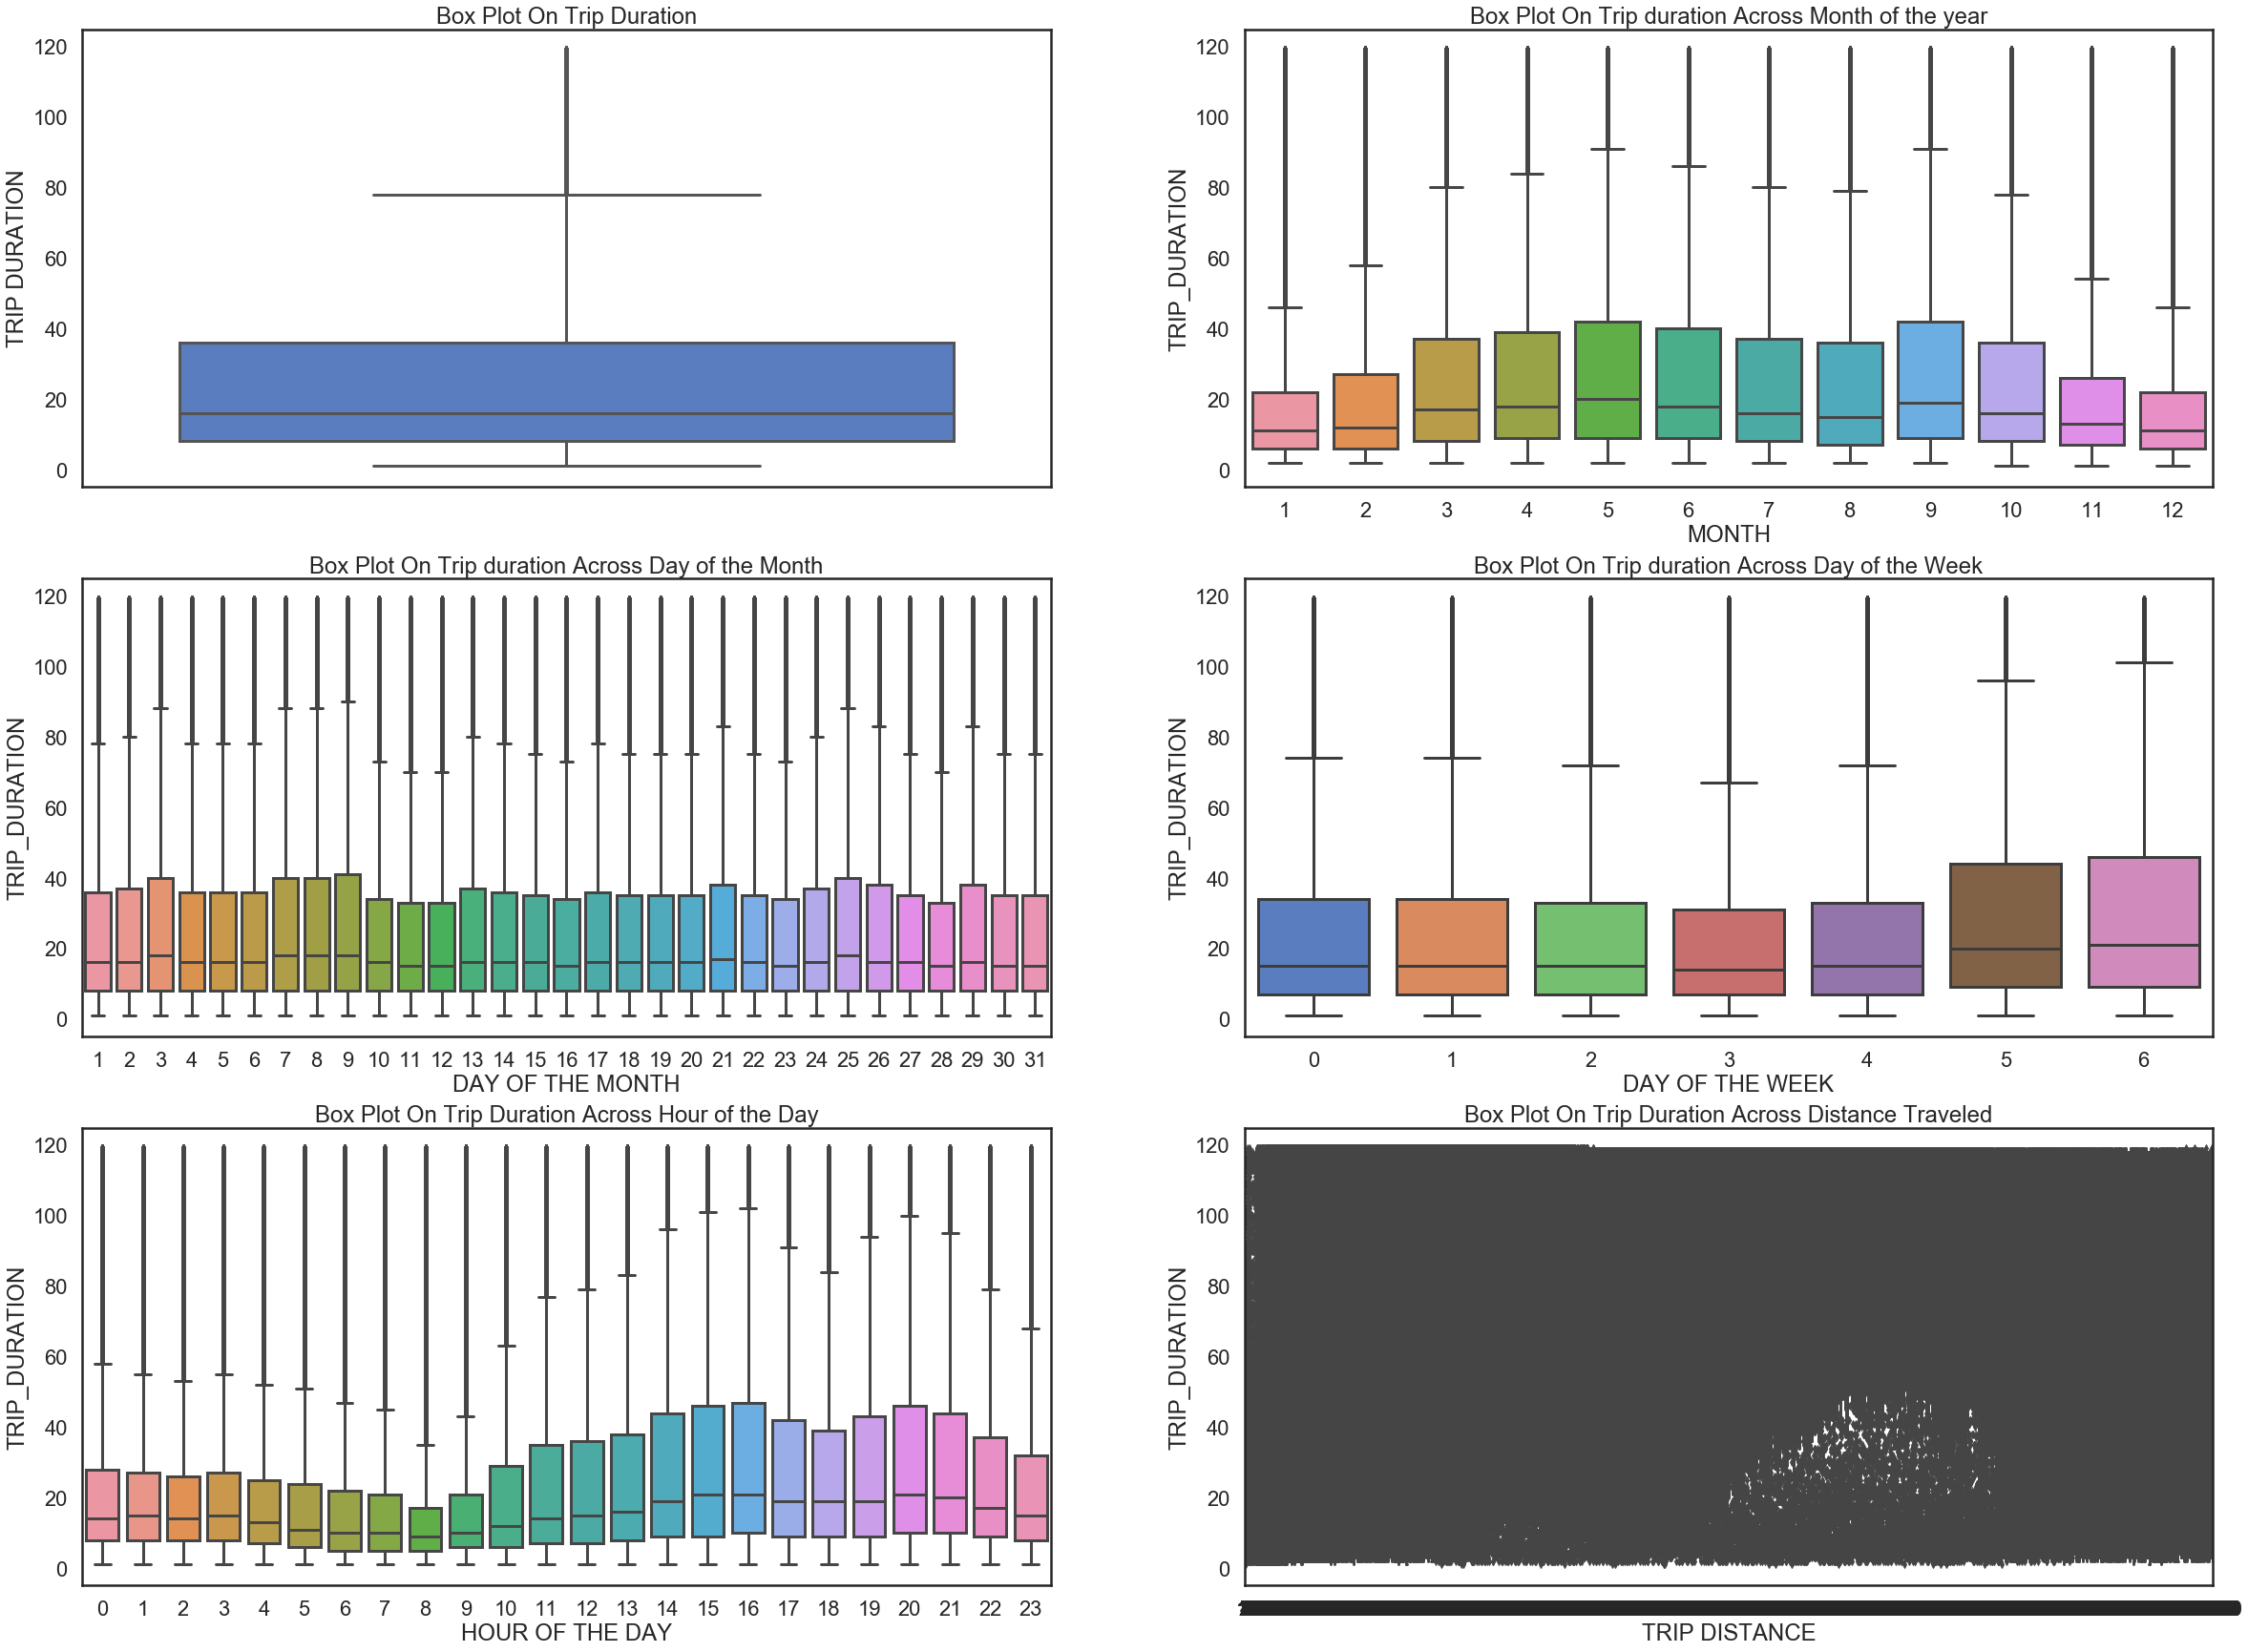

In [74]:
import seaborn as sn
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(40, 30)
sn.boxplot(data=bike_data,y="TRIP_DURATION",orient="v",ax=axes[0][0])
sn.boxplot(data=bike_data,y="TRIP_DURATION",x="month",orient="v",ax=axes[0][1])
sn.boxplot(data=bike_data,y="TRIP_DURATION",x="day",orient="v",ax=axes[1][0])
sn.boxplot(data=bike_data,y="TRIP_DURATION",x="weekday",orient="v",ax=axes[1][1])
sn.boxplot(data=bike_data,y="TRIP_DURATION",x="hour",orient="v",ax=axes[2][0])
sn.boxplot(data=bike_data,y="TRIP_DURATION",x="TRIP_DISTANCE",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='TRIP DURATION',title="Box Plot On Trip Duration")
axes[0][1].set(xlabel='MONTH', ylabel='TRIP_DURATION',title="Box Plot On Trip duration Across Month of the year")
axes[1][0].set(xlabel='DAY OF THE MONTH', ylabel='TRIP_DURATION',title="Box Plot On Trip duration Across Day of the Month")
axes[1][1].set(xlabel='DAY OF THE WEEK', ylabel='TRIP_DURATION',title="Box Plot On Trip duration Across Day of the Week")
axes[2][0].set(xlabel='HOUR OF THE DAY', ylabel='TRIP_DURATION',title="Box Plot On Trip Duration Across Hour of the Day")
axes[2][1].set(xlabel='TRIP DISTANCE', ylabel='TRIP_DURATION',title="Box Plot On Trip Duration Across Distance Traveled")

C:\Users\Sathishkumar V E\Anaconda3\lib\site-packages\seaborn\categorical.py:1527: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


ValueError: 'c' argument has 24 elements, which is not acceptable for use with 'x' with size 0, 'y' with size 0.

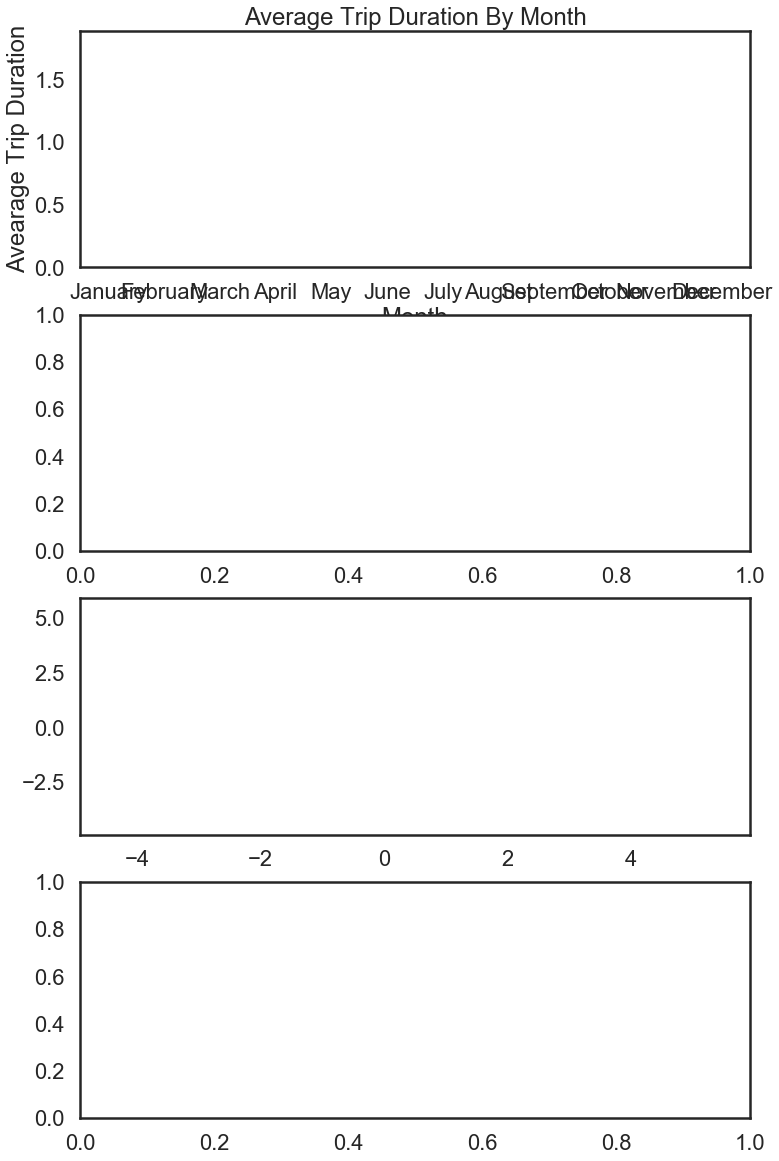

In [78]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(bike_data.groupby("month")["TRIP_DURATION"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="TRIP_DURATION",ascending=False)
sn.barplot(data=monthSorted,x="month",y="TRIP_DURATION",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Trip Duration',title="Average Trip Duration By Month")

hourAggregated = pd.DataFrame(bike_data.groupby(["hour","weekday"],sort=True)["TRIP_DURATION"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["TRIP_DURATION"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Trip Duration',title="Average Trip Duration By Hour Of The Day Across Weekdays",label='big')



[Text(0, 0.5, 'TRIP_DURATION'),
 Text(0.5, 0, 'TRIP DISTANCE'),
 Text(0.5, 1.0, 'Box Plot On Trip Duration Across Distance Traveled')]

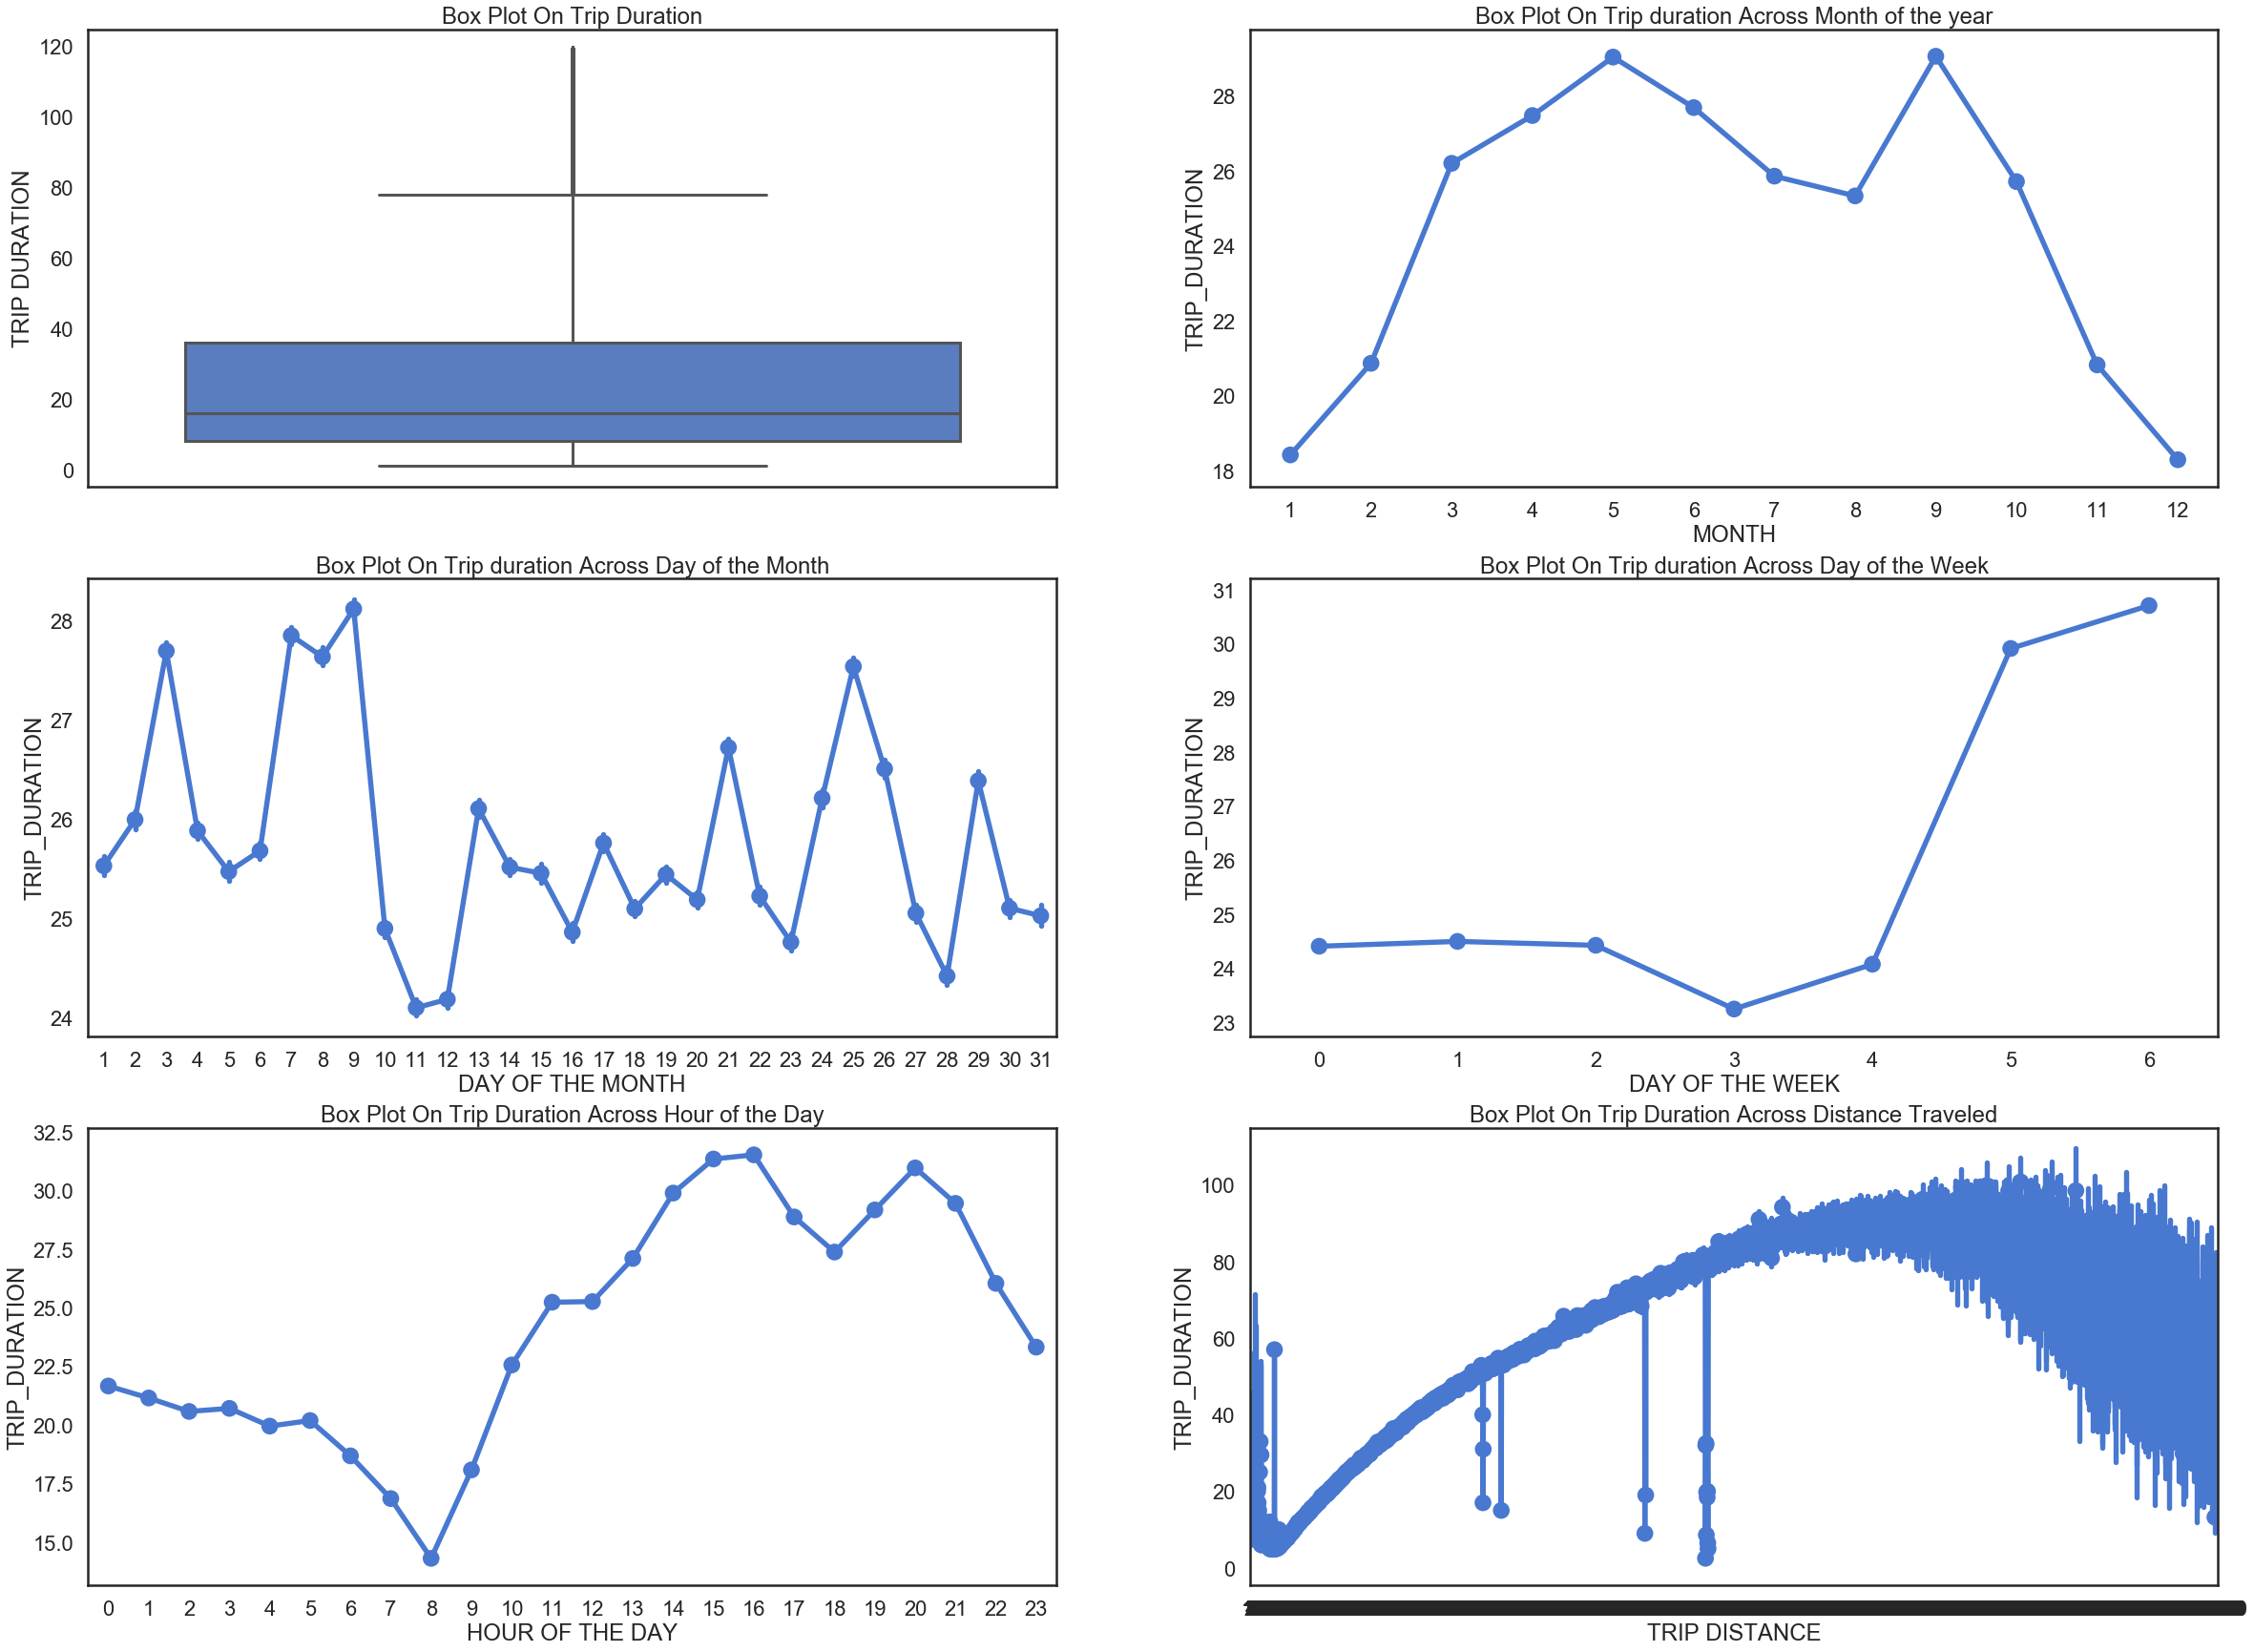

In [79]:
import seaborn as sn
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(40, 30)
sn.boxplot(data=bike_data,y="TRIP_DURATION",orient="v",ax=axes[0][0])
sn.pointplot(data=bike_data,y="TRIP_DURATION",x="month",orient="v",ax=axes[0][1])
sn.pointplot(data=bike_data,y="TRIP_DURATION",x="day",orient="v",ax=axes[1][0])
sn.pointplot(data=bike_data,y="TRIP_DURATION",x="weekday",orient="v",ax=axes[1][1])
sn.pointplot(data=bike_data,y="TRIP_DURATION",x="hour",orient="v",ax=axes[2][0])
sn.pointplot(data=bike_data,y="TRIP_DURATION",x="TRIP_DISTANCE",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='TRIP DURATION',title="Box Plot On Trip Duration")
axes[0][1].set(xlabel='MONTH', ylabel='TRIP_DURATION',title="Box Plot On Trip duration Across Month of the year")
axes[1][0].set(xlabel='DAY OF THE MONTH', ylabel='TRIP_DURATION',title="Box Plot On Trip duration Across Day of the Month")
axes[1][1].set(xlabel='DAY OF THE WEEK', ylabel='TRIP_DURATION',title="Box Plot On Trip duration Across Day of the Week")
axes[2][0].set(xlabel='HOUR OF THE DAY', ylabel='TRIP_DURATION',title="Box Plot On Trip Duration Across Hour of the Day")
axes[2][1].set(xlabel='TRIP DISTANCE', ylabel='TRIP_DURATION',title="Box Plot On Trip Duration Across Distance Traveled")